In [1]:
import pandas as pd
from pycaret.regression import *


In [2]:
#data
data=pd.read_csv('/home/ykkim/Train_data/HS_DataMart_v1.0.csv',encoding='cp949')
data=data.drop(['Unnamed: 0'], axis=1)
data['datetime']=pd.to_datetime(data['datetime'])
data

,datetime,초지_전력사용량,Press_전력사용량,Constant_전력사용량,Wire_전력사용량,AIR_전력사용량,Size_전력사용량,Calender_전력사용량,Drive_전력사용량,Pre-Dryer_전력사용량,After-Dryer_전력사용량,(비정상)지절시 운전,(비정상)카렌더 SHEET BREAK SENSOR TAG,(비정상)PICK-UP VACCUM 파괴 밸브 TAG,TURNING ROLL 보류율,사이로 백수 온도,TURNING ROLL_WIRE 진공도 토탈,TURNING ROLL 속도,CENTER NO2 ROLL 속도,1군 DRYER 속도,NO8 DRYER 속도,CALENDER BTM ROLL속도,PM23_평량,PM23_릴속도
0,2022-04-26 00:00:00,1757.6,670.0,185.8,368.2,170.0,1.4,20.4,220.0,111.8,10.0,0.0,0.0,1.0,86.5844,42.3743,1724.12,1101.2,1101.1,1150.0,1153.3,1152.0,36.8835,NaN
1,2022-04-26 00:15:00,1854.9,670.0,175.8,367.2,160.0,2.5,43.7,210.0,204.7,21.0,0.0,0.0,1.0,86.6723,42.3743,1702.31,1101.3,1101.4,1150.0,1153.3,1152.1,37.8980,NaN
2,2022-04-26 00:30:00,1620.7,660.0,174.9,369.2,170.0,0.0,8.6,220.0,18.0,0.0,0.0,0.0,1.0,86.7994,42.5605,1703.96,1101.4,1101.1,1150.0,1153.3,1152.1,37.3890,NaN
3,2022-04-26 00:45:00,1717.2,670.0,175.9,368.2,170.0,1.4,0.0,210.0,111.7,10.0,0.0,0.0,1.0,86.7853,42.4994,1703.50,1100.8,1101.0,1150.1,1153.3,1152.1,37.8443,NaN
4,2022-04-26 01:00:00,1852.1,670.0,184.8,378.2,170.0,2.7,2.7,220.0,202.7,21.0,0.0,0.0,1.0,86.7961,42.4994,1722.79,1110.3,1110.3,1160.0,1163.5,1162.1,37.3563,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4361,2022-06-10 10:15:00,1879.7,760.0,235.9,417.3,170.0,0.0,19.5,260.0,17.0,0.0,0.0,0.0,1.0,80.2992,43.1220,1662.12,1265.0,1265.8,1320.1,1325.9,1324.3,48.8740,1324.1
4362,2022-06-10 10:30:00,1965.7,750.0,234.8,419.3,160.0,1.7,16.0,260.0,113.9,10.0,0.0,0.0,1.0,81.1845,43.2471,1652.04,1265.0,1263.9,1320.0,1325.9,1324.3,48.1874,1324.1
4363,2022-06-10 10:45:00,2073.0,750.0,236.7,418.4,160.0,3.5,18.4,260.0,207.0,19.0,0.0,0.0,1.0,81.1510,43.3112,1635.33,1262.3,1261.9,1316.6,1322.0,1320.6,48.7256,1324.1
4364,2022-06-10 11:00:00,1948.2,740.0,235.7,419.3,170.0,1.7,16.0,240.0,115.5,10.0,0.0,0.0,1.0,85.0735,43.6225,1773.39,1245.8,1246.4,1292.0,1297.3,1296.0,49.0044,1320.3


In [4]:
from math import floor
def train_test_split_df(df, test_size):   # (df : dataframe, test_size : test_size(0 < test_size < 1) 비율에 따라 테스트/학습 데이터프레임으로 나누어 반환 ) 
  div = floor(df.shape[0] * (1 - test_size))
  return df.loc[:div], df.loc[div + 1:]

train_df,test_df=train_test_split_df(data, 0.20)
print('Train data :',train_df['datetime'].min(),' ~ ',train_df['datetime'].max(),'(',len(train_df),')')
print('Test data :',test_df['datetime'].min(),' ~ ',test_df['datetime'].max(),'(',len(test_df),')')

Train data : 2022-04-26 00:00:00  ~  2022-06-01 09:00:00 ( 3493 )
Test data : 2022-06-01 09:15:00  ~  2022-06-10 11:15:00 ( 873 )


#### 이상치제거

In [6]:
train_df['(비정상)지절시 운전']=train_df['(비정상)지절시 운전'].astype(str)
train_df['(비정상)카렌더 SHEET BREAK SENSOR TAG']=train_df['(비정상)카렌더 SHEET BREAK SENSOR TAG'].astype(str)
train_df['(비정상)PICK-UP VACCUM 파괴 밸브 TAG']=train_df['(비정상)PICK-UP VACCUM 파괴 밸브 TAG'].astype(str)

train_df=train_df[train_df['(비정상)지절시 운전'] == '0.0']   
train_df=train_df[train_df['(비정상)카렌더 SHEET BREAK SENSOR TAG'] == '0.0']
train_df=train_df[train_df['(비정상)PICK-UP VACCUM 파괴 밸브 TAG'] == '1.0']
train_df.info()
print('Train data :',train_df['datetime'].min(),' ~ ',train_df['datetime'].max(),'(',len(train_df),')')

#===================================================================================================
test_df['(비정상)지절시 운전']=test_df['(비정상)지절시 운전'].astype(str)
test_df['(비정상)카렌더 SHEET BREAK SENSOR TAG']=test_df['(비정상)카렌더 SHEET BREAK SENSOR TAG'].astype(str)
test_df['(비정상)PICK-UP VACCUM 파괴 밸브 TAG']=test_df['(비정상)PICK-UP VACCUM 파괴 밸브 TAG'].astype(str)

test_df=test_df[test_df['(비정상)지절시 운전'] == '0.0']   
test_df=test_df[test_df['(비정상)카렌더 SHEET BREAK SENSOR TAG'] == '0.0']
test_df=test_df[test_df['(비정상)PICK-UP VACCUM 파괴 밸브 TAG'] == '1.0']
test_df.info()
print('Test data :',test_df['datetime'].min(),' ~ ',test_df['datetime'].max(),'(',len(test_df),')')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3349 entries, 0 to 3492
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   datetime                         3349 non-null   datetime64[ns]
 1   초지_전력사용량                         3349 non-null   float64       
 2   Press_전력사용량                      3349 non-null   float64       
 3   Constant_전력사용량                   3349 non-null   float64       
 4   Wire_전력사용량                       3349 non-null   float64       
 5   AIR_전력사용량                        3349 non-null   float64       
 6   Size_전력사용량                       3349 non-null   float64       
 7   Calender_전력사용량                   3349 non-null   float64       
 8   Drive_전력사용량                      3349 non-null   float64       
 9   Pre-Dryer_전력사용량                  3349 non-null   float64       
 10  After-Dryer_전력사용량                3349 non-null   float64    

#feature engineering
1. (비정상) column downtime 제거  (209개 제거됨)   
2. datetime을 feature(mon,day,hour,min,weekday)화    

 *  feature :    
    1. 'TURNING ROLL 보류율',    
    2. '사이로 백수 온도',
    3. 'TURNING ROLL_WIRE 진공도 토탈',     
    4. 'TURNING ROLL 속도',    
    5. 'CENTER NO2 ROLL 속도',     
    6. '1군 DRYER 속도',   
    7. 'NO8 DRYER 속도',    
    8. 'CALENDER BTM ROLL속도',    
    9. 'PM23_평량',    
    10. 'PM23_릴속도'


In [8]:
train=train_df[['datetime',
'TURNING ROLL 보류율',
'사이로 백수 온도',
'TURNING ROLL_WIRE 진공도 토탈',
'TURNING ROLL 속도',
 'CENTER NO2 ROLL 속도',
 '1군 DRYER 속도',
 'NO8 DRYER 속도',
 'CALENDER BTM ROLL속도',
 'PM23_평량',
 'PM23_릴속도','초지_전력사용량']]


test=test_df[['datetime', 
'TURNING ROLL 보류율',
'사이로 백수 온도',
'TURNING ROLL_WIRE 진공도 토탈',
'TURNING ROLL 속도',
 'CENTER NO2 ROLL 속도',
 '1군 DRYER 속도',
 'NO8 DRYER 속도',
 'CALENDER BTM ROLL속도',
 'PM23_평량',
 'PM23_릴속도','초지_전력사용량']]


In [17]:
s = setup(train, target = '초지_전력사용량')   #setup()이라는 강력한 함수로 추후에 필요한 모든 환경을 initialize해줌
 #column에 대한 자료형이 나오고, 자동으로 setup으로 설정된 모든 세팅값이 오른쪽 화면처럼 출력됩니다.

,Description,Value
0,session_id,3455
1,Target,초지_전력사용량
2,Original Data,"(3349, 12)"
3,Missing Values,True
4,Numeric Features,10
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(2344, 44)"


In [10]:
best = compare_models()
#ML 모델을 생성해서 학습하는 방법을 알아봤으니, pycaret의 강력한 기능인 모든 ML기법을 활용해서 비교하는 방법을 알아보겠습니다.

# compare_models()라는 함수로 지원하는 대부분의 ML모델들을 자동으로 학습하여 결과를 띄워줍니다. 이때 파라미터로 원하는 metric으로 정렬을 할 수 있고, 사용을 원하는 모델의 개수를 지정해 줄 수 있습니다.

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ada,AdaBoost Regressor,56.8692,6220.5227,78.0401,0.3806,0.0414,0.0293,0.1670
lasso,Lasso Regression,56.6425,6223.9777,78.0439,0.3805,0.0414,0.0292,0.0250
en,Elastic Net,56.7485,6227.0253,78.0613,0.3804,0.0414,0.0292,0.0270
br,Bayesian Ridge,56.7335,6227.6110,78.0674,0.3803,0.0414,0.0292,0.0150
omp,Orthogonal Matching Pursuit,57.4212,6282.6050,78.4288,0.3746,0.0416,0.0296,0.0090
ridge,Ridge Regression,57.3004,6315.1837,78.6596,0.3703,0.0418,0.0295,0.0110
lr,Linear Regression,57.3215,6317.6322,78.6757,0.3700,0.0418,0.0295,0.3720
huber,Huber Regressor,57.8209,6346.5227,78.8730,0.3674,0.0419,0.0298,0.0830
lar,Least Angle Regression,57.4665,6342.3269,78.8439,0.3673,0.0419,0.0296,0.0220
gbr,Gradient Boosting Regressor,56.3832,6343.1828,78.8457,0.3666,0.0419,0.0291,0.3210


In [ ]:
create_model() # 함수로 특정 ML을 만들고 학습할 수 있는데요, 지원하는 ML과 파라미터로 넣어야 하는 이름은 다음과 같습니다.

In [11]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


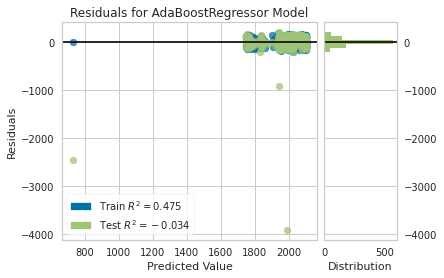

In [12]:
plot_model(best, plot = 'residuals')

### prediction

In [13]:
predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,AdaBoost Regressor,60.2629,27145.5971,164.7592,-0.0341,0.0692,0.0286


,TURNING ROLL 보류율,사이로 백수 온도,TURNING ROLL_WIRE 진공도 토탈,TURNING ROLL 속도,1군 DRYER 속도,CALENDER BTM ROLL속도,PM23_평량,PM23_릴속도,datetime_month_4,datetime_month_5,...,datetime_hour_23,datetime_hour_3,datetime_hour_4,datetime_hour_5,datetime_hour_6,datetime_hour_7,datetime_hour_8,datetime_hour_9,초지_전력사용량,Label
0,78.799698,44.748600,1655.989990,1274.800049,1340.099976,1342.400024,37.780899,1316.708618,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2003.199951,1980.479034
1,80.004997,43.936798,1769.489990,1282.599976,1350.000000,1351.599976,37.126801,1316.708618,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2001.599976,1996.934489
2,82.978302,44.998901,1833.469971,1271.900024,1321.000000,1323.800049,56.118000,1316.708618,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2102.699951,2008.426784
3,85.890900,43.997898,1954.500000,1224.599976,1265.000000,1265.900024,64.463501,1316.708618,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1832.900024,1944.363718
4,77.365799,44.684502,1711.359985,1252.900024,1320.000000,1322.500000,34.582298,1322.199951,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1823.300049,1944.242225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,77.875099,45.810600,1751.209961,1281.199951,1350.099976,1353.000000,37.282398,1316.708618,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2086.699951,1980.479034
1001,81.353302,45.310101,1835.550049,1238.800049,1303.000000,1305.199951,38.091202,1316.708618,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2084.699951,1944.242225
1002,84.669899,42.810699,1677.530029,1277.400024,1340.000000,1341.800049,37.448601,1316.708618,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1880.900024,1996.981782
1003,77.982101,45.560398,1714.680054,1282.199951,1350.000000,1351.900024,37.243198,1351.900024,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1996.900024,1981.435991


#save the model


In [15]:
save_model(best, '/home/ykkim/pipeline_from_AutoML/pycaret/my_best_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='초지_전력사용량',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strateg...
                 ('dummy', Dummify(target='초지_전력사용량')),
                 ('fix_perfect', Remove_100(target='초지_전력사용량')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passt

In [16]:
loaded_model = load_model('/home/ykkim/pipeline_from_AutoML/pycaret/my_best_pipeline')
print(loaded_model)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='초지_전력사용량',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strateg...
                ('dummy', Dummify(target='초지_전력사용량')),
                ('fix_perfect', Remove_100(target='초지_전력사용량')),
                ('clean_names', Clean_Colum_Names()),
                ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                (

### Times Series(Moorim) pip install pycaret-ts-alpha(아직 베타 버전)

In [2]:
import pandas as pd
data=pd.read_excel('/home/ykkim/Train_data/무림페이퍼_15분사용전력_210401-220630.xlsx')  
data=data.drop(['등록시각'],axis=1)

data['기준시각']=pd.to_datetime(data['기준시각'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42766 entries, 0 to 42765
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   기준시각         42766 non-null  datetime64[ns]
 1   직전 15분 사용전력  42766 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 668.3 KB


In [9]:
from sklearn.model_selection import HalvingGridSearchCV

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/ykkim/anaconda3/envs/pycaret/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3398, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_6240/102099828.py", line 1, in <cell line: 1>
    from sklearn.model_selection import HalvingGridSearchCV
  File "/home/ykkim/anaconda3/envs/pycaret/lib/python3.9/site-packages/sklearn/model_selection/__init__.py", line 80, in __getattr__
ImportError: HalvingGridSearchCV is experimental and the API might change without any deprecation cycle. To use it, you need to explicitly import enable_halving_search_cv:
from sklearn.experimental import enable_halving_search_cv

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/ykkim/anaconda3/envs/pycaret/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 1993, in showtraceback
    stb = self.InteractiveTB.structured_traceback(


In [13]:
from sklearn.model_selection._search import _check_param_grid

ImportError: cannot import name '_check_param_grid' from 'sklearn.model_selection._search' (/home/ykkim/anaconda3/envs/pycaret/lib/python3.9/site-packages/sklearn/model_selection/_search.py)

In [15]:
import sklearn.model_selection._search


In [14]:
from sklearn.model_selection import ParameterGrid

In [10]:
from pycaret.time_series import *
# s = setup(data, fh = 3, fold = 5, session_id = 123)

ImportError: cannot import name '_check_param_grid' from 'sklearn.model_selection._search' (/home/ykkim/anaconda3/envs/pycaret/lib/python3.9/site-packages/sklearn/model_selection/_search.py)

In [7]:
import pycaret   #pip install --pre pycaret
import sklearn
print(pycaret.__version__)
print(sklearn.__version__)

2.3.10
1.1.1


In [ ]:
#This function trains and evaluates the performance
# of all the estimators available in the model library
#  using cross-validation. 
# The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the get_metrics function. Custom metrics can be added or removed using add_metric and remove_metric function.
best = compare_models()

In [ ]:
plot_model(best, plot = 'forecast', data_kwargs = {'fh' : 24})

In [ ]:
plot_model(best, plot = 'diagnostics')

In [ ]:
plot_model(best, plot = 'insample')

In [ ]:
#prediction
# finalize model
final_best = finalize_model(best)
predict_model(best, fh = 24)

In [ ]:
#save the model
save_model(final_best, 'my_final_best_model')


In [ ]:
loaded_model = load_model('my_final_best_model')
print(loaded_model)